In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
# %matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
def dict_dtypes(df):
    g = df.columns.to_series().groupby(df.dtypes).groups
    dict_dtypes = {k.name: v for k, v in g.items()}
    return dict_dtypes

## 1. Load Data

In [3]:
df = pd.read_csv('../data/interim/out2.csv')

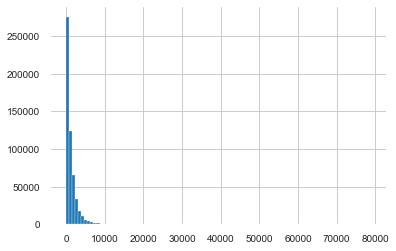

In [4]:
df['VALUE_PRODUCT_CREDIT_CARD_OUTFLOW'].hist(bins=100)

In [5]:
df['SKProductFirstTransaction'] = df['SKProductFirstTransaction'].astype(str)

df['FlagInvitedUser'].fillna(0, inplace=True)
df['FlagInvitedUser'] = df['FlagInvitedUser'].astype(int)

df['FlagEmployee'].fillna(0, inplace=True)
df['FlagEmployee'] = df['FlagEmployee'].astype(int)

df['PossuiVeiculo'].fillna(0, inplace=True)
df['PossuiVeiculo'] = df['PossuiVeiculo'].astype(int)

In [6]:
dict_dtypes(df)['float64']

Index(['VALUE_ACCOUNT_CREDIT_INFLOW', 'VALUE_NOT_CATEGORIZED_INFLOW',
       'VALUE_INVOICE_PAYMENT_INFLOW', 'VALUE_INSTALLMENT_PAYMENT_INFLOW',
       'VALUE_GIFTS_INFLOW', 'VALUE_RECEIPTS_INFLOW',
       'VALUE_SUBSCRIPTIONS_SERVICES_OUTFLOW',
       'VALUE_BARS_RESTAURANTS_OUTFLOW', 'VALUE_PERSONAL_CARE_OUTFLOW',
       'VALUE_SEND_OUTFLOW', 'VALUE_RECREATION_OUTFLOW',
       'VALUE_MARKETPLACE_OUTFLOW', 'VALUE_HOME_RENT_OUTFLOW',
       'VALUE_NOT_CATEGORIZED_OUTFLOW', 'VALUE_OTHERS_OUTFLOW',
       'VALUE_INVOICE_PAYMENT_OUTFLOW', 'VALUE_HEALTH_OUTFLOW',
       'VALUE_TRANSPORTATION', 'VALUE_CLOTHES_OUTFLOW',
       'PARCELING_REMAINING_VALUE', 'PARCELING_COUNT_NOT_PAID_YET',
       'VALUE_PRODUCT_CARD_OUTFLOW', 'VALUE_PRODUCT_CREDIT_CARD_OUTFLOW',
       'VALUE_PRODUCT_TAXES_OUTFLOW', 'VALUE_PRODUCT_OBJECTIVES_OUTFLOW',
       'VALUE_PRODUCT_OTHERS_OUTFLOW', 'VALUE_PRODUCT_BILLET_INFLOW',
       'VALUE_PRODUCT_CREDIT_CARD_INFLOW', 'VALUE_PRODUCT_OBJECTIVES_INFLOW',
       'VALUE_

In [7]:
columns_values = [x for x in dict_dtypes(df)['float64'] if 'VALUE_' in x]
columns_counts = [x for x in dict_dtypes(df)['float64'] if 'COUNT_' in x]

In [8]:
columns_counts

['VALUE_ACCOUNT_CREDIT_INFLOW',
 'PARCELING_COUNT_NOT_PAID_YET',
 'COUNT_SUBSCRIPTIONS_SERVICES',
 'COUNT_BARS_RESTAURANTS',
 'COUNT_ACCOUNT_CREDIT',
 'COUNT_PERSONAL_CARE',
 'COUNT_SEND',
 'COUNT_RECREATION',
 'COUNT_MARKETPLACE',
 'COUNT_HOME_RENT',
 'COUNT_NOT_CATEGORIZED',
 'COUNT_OTHERS',
 'COUNT_INVOICE_PAYMENT',
 'COUNT_INSTALLMENT_PAYMENT',
 'COUNT_GIFTS',
 'COUNT_RECEIPTS',
 'COUNT_HEALTH',
 'COUNT_SERVICE_CHARGE',
 'COUNT_TRANSPORTATION',
 'COUNT_CLOTHES_OUTFLOW']

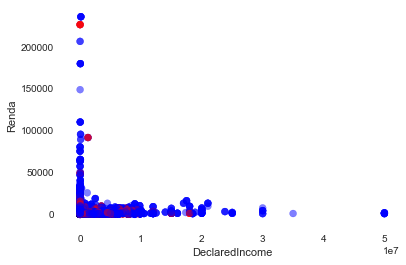

In [9]:
colors = ['blue', 'red']
i='DeclaredIncome'
j='Renda'
df_temp = df[(df[i]>0)&(df[j]>0)]

plt.scatter(df_temp[i], 
            df_temp[j],
            c= df_temp['EVER60'],
            cmap = matplotlib.colors.ListedColormap(colors), alpha =0.5)
plt.xlabel(i)
plt.ylabel(j)
plt.show()

### Cut them all

In [10]:
max_value = 8000
max_income = 20000

df.loc[df['VALUE_ACCOUNT_CREDIT_INFLOW'] >= max_value, 'VALUE_ACCOUNT_CREDIT_INFLOW'] = max_value
df.loc[df['VALUE_NOT_CATEGORIZED_INFLOW'] >= max_value, 'VALUE_NOT_CATEGORIZED_INFLOW'] = max_value
df.loc[df['VALUE_INVOICE_PAYMENT_INFLOW'] >= max_value, 'VALUE_INVOICE_PAYMENT_INFLOW'] = max_value
df.loc[df['VALUE_INSTALLMENT_PAYMENT_INFLOW'] >= max_value, 'VALUE_INSTALLMENT_PAYMENT_INFLOW'] = max_value
df.loc[df['VALUE_GIFTS_INFLOW'] >= max_value, 'VALUE_GIFTS_INFLOW'] = max_value
df.loc[df['VALUE_RECEIPTS_INFLOW'] >= max_value, 'VALUE_RECEIPTS_INFLOW'] = max_value
df.loc[df['VALUE_SUBSCRIPTIONS_SERVICES_OUTFLOW'] >= max_value, 'VALUE_SUBSCRIPTIONS_SERVICES_OUTFLOW'] = max_value
df.loc[df['VALUE_BARS_RESTAURANTS_OUTFLOW'] >= max_value, 'VALUE_BARS_RESTAURANTS_OUTFLOW'] = max_value
df.loc[df['VALUE_PERSONAL_CARE_OUTFLOW'] >= max_value, 'VALUE_PERSONAL_CARE_OUTFLOW'] = max_value
df.loc[df['VALUE_SEND_OUTFLOW'] >= max_value, 'VALUE_SEND_OUTFLOW'] = max_value
df.loc[df['VALUE_RECREATION_OUTFLOW'] >= max_value, 'VALUE_RECREATION_OUTFLOW'] = max_value
df.loc[df['VALUE_MARKETPLACE_OUTFLOW'] >= max_value, 'VALUE_MARKETPLACE_OUTFLOW'] = max_value
df.loc[df['VALUE_HOME_RENT_OUTFLOW'] >= max_value, 'VALUE_HOME_RENT_OUTFLOW'] = max_value
df.loc[df['VALUE_NOT_CATEGORIZED_OUTFLOW'] >= max_value, 'VALUE_NOT_CATEGORIZED_OUTFLOW'] = max_value
df.loc[df['VALUE_OTHERS_OUTFLOW'] >= max_value, 'VALUE_OTHERS_OUTFLOW'] = max_value
df.loc[df['VALUE_INVOICE_PAYMENT_OUTFLOW'] >= max_value, 'VALUE_INVOICE_PAYMENT_OUTFLOW'] = max_value
df.loc[df['VALUE_HEALTH_OUTFLOW'] >= max_value, 'VALUE_HEALTH_OUTFLOW'] = max_value
df.loc[df['VALUE_TRANSPORTATION'] >= max_value, 'VALUE_TRANSPORTATION'] = max_value
df.loc[df['VALUE_CLOTHES_OUTFLOW'] >= max_value, 'VALUE_CLOTHES_OUTFLOW'] = max_value
df.loc[df['VALUE_PRODUCT_CARD_OUTFLOW'] >= max_value, 'VALUE_PRODUCT_CARD_OUTFLOW'] = max_value
df.loc[df['VALUE_PRODUCT_CREDIT_CARD_OUTFLOW'] >= max_value, 'VALUE_PRODUCT_CREDIT_CARD_OUTFLOW'] = max_value
df.loc[df['VALUE_PRODUCT_TAXES_OUTFLOW'] >= max_value, 'VALUE_PRODUCT_TAXES_OUTFLOW'] = max_value
df.loc[df['VALUE_PRODUCT_OBJECTIVES_OUTFLOW'] >= max_value, 'VALUE_PRODUCT_OBJECTIVES_OUTFLOW'] = max_value
df.loc[df['VALUE_PRODUCT_OTHERS_OUTFLOW'] >= max_value, 'VALUE_PRODUCT_OTHERS_OUTFLOW'] = max_value
df.loc[df['VALUE_PRODUCT_BILLET_INFLOW'] >= max_value, 'VALUE_PRODUCT_BILLET_INFLOW'] = max_value
df.loc[df['VALUE_PRODUCT_CREDIT_CARD_INFLOW'] >= max_value, 'VALUE_PRODUCT_CREDIT_CARD_INFLOW'] = max_value
df.loc[df['VALUE_PRODUCT_OBJECTIVES_INFLOW'] >= max_value, 'VALUE_PRODUCT_OBJECTIVES_INFLOW'] = max_value
df.loc[df['VALUE_PRODUCT_INVOICE_INFLOW'] >= max_value, 'VALUE_PRODUCT_INVOICE_INFLOW'] = max_value
df.loc[df['VALUE_PRODUCT_TED_TRANSFER_INFLOW'] >= max_value, 'VALUE_PRODUCT_TED_TRANSFER_INFLOW'] = max_value
 
# df.loc[df['Renda']>=0, 'Renda'] = 0                                             
# df.loc[df['DeclaredIncome'] >= max_income, 'DeclaredIncome'] = max_income
# df.loc[df['Renda'] >= max_income, 'Renda'] = max_income


df.loc[df['SALDO_CRED_DISP_M_1'] >= max_value, 'SALDO_CRED_DISP_M_1'] = max_value
df.loc[df['SALDO_CRED_DISP_M_2'] >= max_value, 'SALDO_CRED_DISP_M_2'] = max_value
df.loc[df['SALDO_CRED_DISP_M_3'] >= max_value, 'SALDO_CRED_DISP_M_3'] = max_value
df.loc[df['SALDO_CRED_DISP_M_4'] >= max_value, 'SALDO_CRED_DISP_M_4'] = max_value

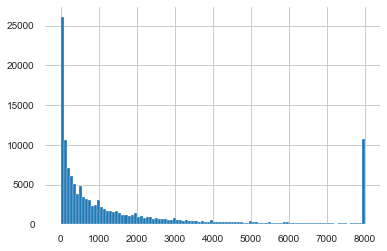

In [11]:
df[df['VALUE_PRODUCT_TED_TRANSFER_INFLOW']>0]['VALUE_PRODUCT_TED_TRANSFER_INFLOW'].hist(bins=100)

In [12]:
df['SALDO_CRED_DISP_M_1'].max()

8000.0

## Save Data

In [13]:
df.to_csv('../data/interim/out3.csv', index =False)

In [14]:
df.count()

CLIENTID                        599238
EVER60                          599238
M0                              599238
VALUE_ACCOUNT_CREDIT_INFLOW     547748
VALUE_NOT_CATEGORIZED_INFLOW    547748
                                 ...  
Renda                           389220
SALDO_CRED_DISP_M_4             426170
SALDO_CRED_DISP_M_3             426170
SALDO_CRED_DISP_M_2             426170
SALDO_CRED_DISP_M_1             426170
Length: 68, dtype: int64

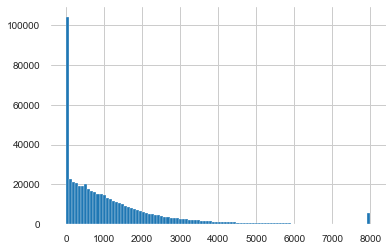

In [15]:
df['VALUE_PRODUCT_CREDIT_CARD_OUTFLOW'].hist(bins=100)